### 1. Import modules.

In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score
import scipy
from scipy.stats import skewnorm
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
# import neptune.new as neptune
sns.set_palette('pastel')
sns.set_style('ticks')
# run = neptune.init(project='projektmlcdv/ml-project-MW-MM')

### 2. Read the data.

In [6]:
X = pd.read_csv(os.path.join('data','train_data.csv'), header=None)
y = pd.read_csv(os.path.join('data','train_labels.csv'), header=None, names=['y'])

In [7]:
y.value_counts()

y 
 1    3375
-1     375
dtype: int64

##### As we can see above, we are dealing with an imbalanced classification with a proportion of about 1:10.

### 3. Split the data into training and test sets, keeping the distribution.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### 3. Change labels to 1 for miniority class and 0 for maniority caused by the way the metrics work.

In [9]:
encoder = lambda x:1 if x == -1 else 0
decoder = lambda x:-1 if x == 1 else 1

In [10]:
y_train = y_train['y'].apply(encoder)

### 4. Check for missing data and duplicates.


In [11]:
y_train.value_counts()

0    2531
1     281
Name: y, dtype: int64

In [12]:
X_train.isnull().sum().sum()

0

In [13]:
y_train.isnull().sum()

0

In [14]:
X_train.duplicated().sum()

0

### 5. Descriptive statistics.


In [15]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,...,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,28.916917,12.432106,381.224784,309.560306,-651.539878,33.944310,20.280541,17.236437,15.925969,12.882821,...,14.263433,29.259728,22.626833,18.048787,16.224895,5.785926,9.904644,-7.502765,-0.964647,34.158446
std,285.279171,213.317975,43317.026554,57359.674537,21957.171896,717.553834,892.158766,871.253991,531.034462,236.178769,...,269.718978,550.407831,267.261175,509.052222,817.730549,655.797012,204.253544,789.343182,627.968372,763.762373
min,-989.450000,-859.922000,-163336.428000,-195523.450000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2483.357000
25%,-170.399500,-134.311250,-29092.729250,-38291.534250,-14772.170250,-445.204750,-589.442750,-565.165000,-344.228000,-144.149250,...,-171.500250,-350.346750,-154.337250,-325.681500,-556.352250,-424.504750,-128.960750,-555.329750,-417.775750,-458.571000
50%,31.216000,5.684000,1055.043000,235.750000,-440.930500,29.213500,-3.601000,1.080000,10.899000,14.185000,...,13.456500,50.028000,25.896000,12.406500,4.904000,-6.973000,6.956000,-9.558500,-7.628000,27.108000
75%,213.747500,157.773750,29858.276750,40306.220750,14140.984000,511.696000,614.383250,600.532000,374.097500,177.574750,...,196.147750,403.818000,199.103750,363.377750,584.127000,425.752250,148.973750,535.655500,414.890250,551.974000
max,1224.394000,697.274000,177744.241000,215372.854000,86287.955000,2446.466000,3012.088000,2966.971000,1914.308000,800.575000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2231.513000,657.453000,2693.255000,2204.527000,2664.074000


Due to huge amount of columns, we will not go into details, but at the first glance we can see that the data vary in scale.

Check skewness of the data.

In [17]:
X_train.skew().describe()

count    10000.000000
mean         0.000097
std          0.046129
min         -0.236023
25%         -0.030388
50%         -0.000266
75%          0.031692
max          0.178937
dtype: float64

For better understanding of the results, we plot the columns with max an min skewness.

<AxesSubplot:xlabel='9792', ylabel='Density'>

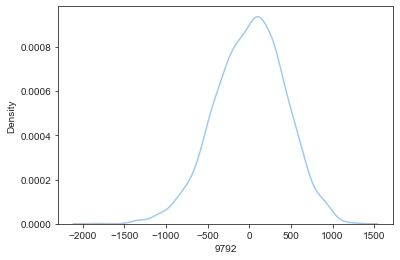

In [18]:
sns.kdeplot(pd.DataFrame(X_train)[X_train.skew().idxmin()])

<AxesSubplot:xlabel='6480', ylabel='Density'>

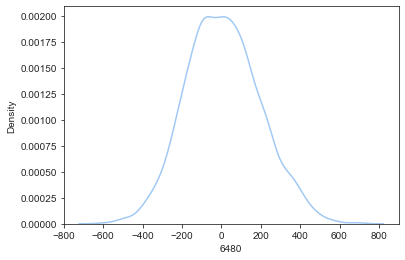

In [19]:
sns.kdeplot(pd.DataFrame(X_train)[X_train.skew().idxmax()])

As we can see above, the data follow a normal distribution., but there is possibility of some outliers, so StandardScaler may be useful.

### 6. Data visualization. 

In [12]:
pca = PCA(n_components=2, whiten=True)

In [13]:
X_train_standarized = StandardScaler().fit_transform(X_train)

In [14]:
X_pca = pca.fit_transform(X_train_standarized)

C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

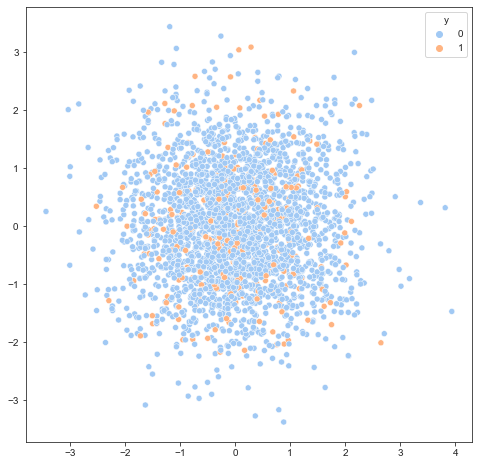

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(X_pca[:,0],
           X_pca[:,1], hue=y_train)

Perplexity = 5


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


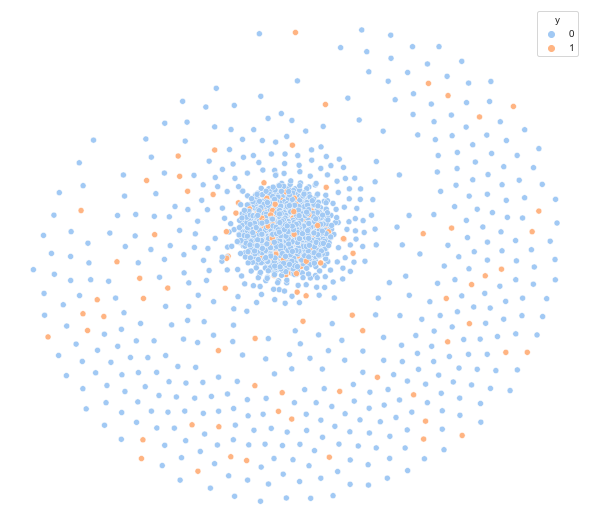

Perplexity = 10


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


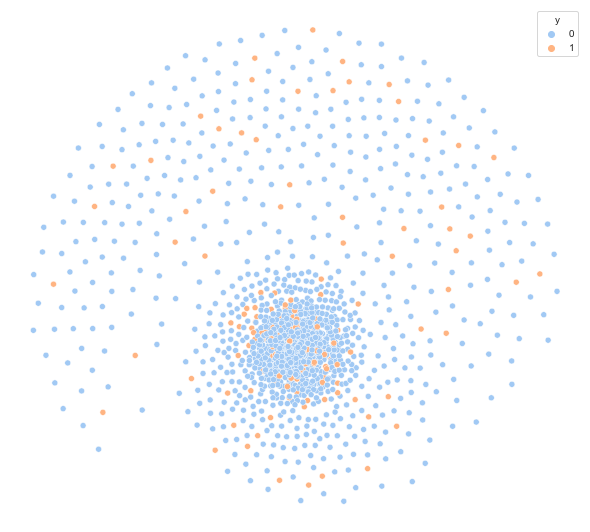

Perplexity = 30


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


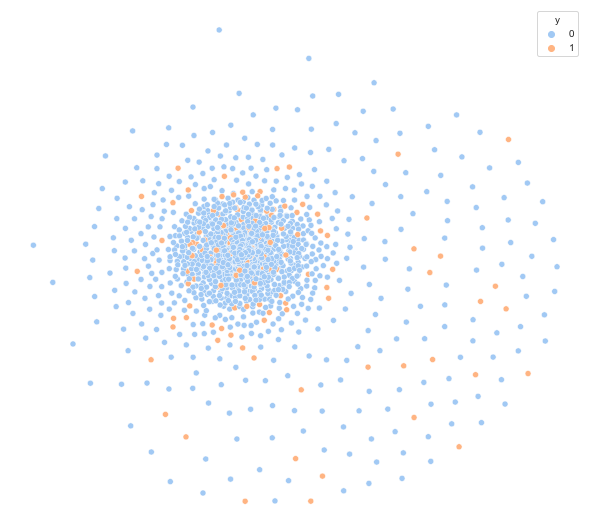

Perplexity = 50


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


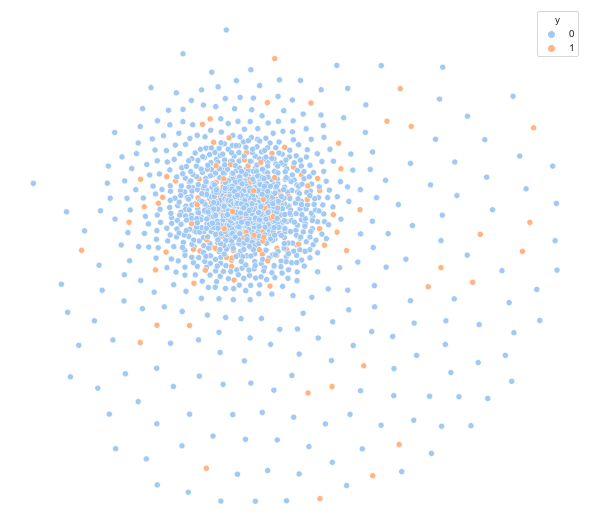

Perplexity = 100


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


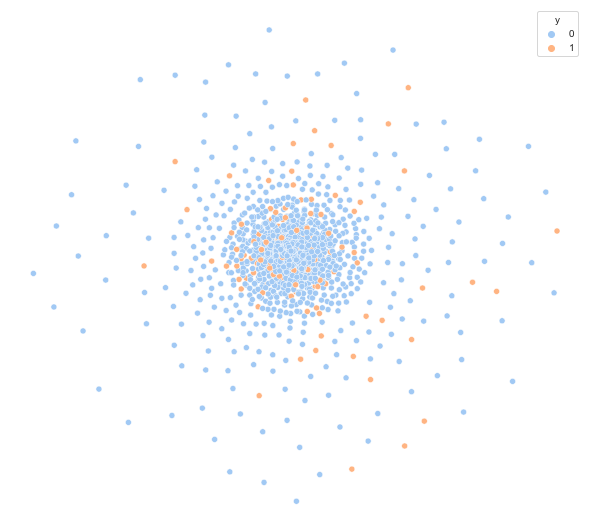

Perplexity = 500


C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


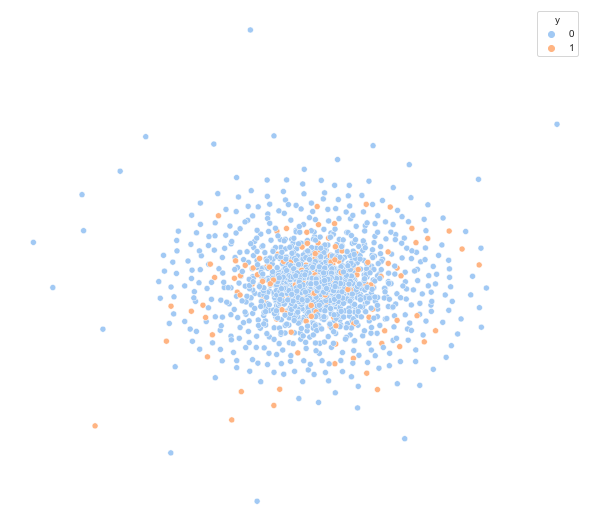

In [16]:
for perplexity in [5, 10, 30, 50, 100, 500]:
    print(f'Perplexity = {perplexity}')
    X_tsne = TSNE(learning_rate=100, perplexity=perplexity).fit_transform(X_train_standarized)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
    sns.scatterplot(X_tsne[:,0],
           X_tsne[:,1], hue=y_train)
    plt.show()

No linear clustering visible.

### 7. Metrics

Due to the problem of imbalanced classification, we decided to choose the f1-weighted metric because we care about both classes.
If minority class was more important we would probably choose the f2 metric.